In [ ]:
# CONCENTRATION SUR LA CLASSE 2 PARCE QUE JE ME DISPERSE PARTOUT PARTOUT ET CA VA PAS DU TOUT
#CLASSE 2 ARBRE DE DECISION

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, neighbors,tree, ensemble, model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split


df = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv')
df = df.drop(['Unnamed: 0','peak_int', 'class3'], 1) 
df.head()

,ACCESSION,class1,class2,AC_mode,ion_precursor_mz,num_peak,peak_mz,peak_rel_int
0,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,0,0.140564,0.122807,0.063692,0.002695
1,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,0,0.140564,0.122807,0.037912,0.008985
2,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,0,0.140564,0.122807,0.034229,0.089847
3,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,0,0.140564,0.122807,0.030329,0.053908
4,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,0,0.140564,0.122807,0.028596,0.013477


In [4]:
flavo = df[(df.class1 == 'Flavonoid')]
flavo = flavo.drop('class1',1)
flavo.head()

,ACCESSION,class2,AC_mode,ion_precursor_mz,num_peak,peak_mz,peak_rel_int
45,PM000314,Flavone,1,0.293857,0.087719,0.127383,0.089847
46,PM000314,Flavone,1,0.293857,0.087719,0.123484,0.001797
47,PM000314,Flavone,1,0.293857,0.087719,0.107886,0.004492
48,PM000314,Flavone,1,0.293857,0.087719,0.101386,0.016173
49,PM000314,Flavone,1,0.293857,0.087719,0.081889,0.002695


In [5]:
flavo['class2'].value_counts()

Flavonol           8088
Flavone            2451
Anthocyanin        1862
Flavanone          1097
Chalcone            706
Isoflavone          648
Flavanol            286
Aurone               75
Isoflavane           55
Phloridzin           37
Pterocarpan          36
Silybin              30
Dihydroflavonol      26
Isoflavanone         19
Silychristin         16
Xanthohumol          16
Flavonoid            11
Isoflavan            10
Isoflavene           10
Bavachromene          8
Stevenin              2
Name: class2, dtype: int64

In [18]:
flavo.sort_values(by='class2', ascending = False)

,ACCESSION,class2,AC_mode,ion_precursor_mz,num_peak,peak_mz,peak_rel_int
6645,PM009701,Xanthohumol,1,0.161040,0.122807,0.049393,0.089847
5140,PM006501,Xanthohumol,0,0.162147,0.035088,0.037695,0.002695
6656,PM009702,Xanthohumol,0,0.162147,0.070175,0.049827,0.003594
5139,PM006501,Xanthohumol,0,0.162147,0.035088,0.049827,0.006289
5138,PM006501,Xanthohumol,0,0.162147,0.035088,0.063692,0.089847
6655,PM009702,Xanthohumol,0,0.162147,0.070175,0.041594,0.003594
6654,PM009702,Xanthohumol,0,0.162147,0.070175,0.037695,0.026954
6653,PM009702,Xanthohumol,0,0.162147,0.070175,0.063692,0.089847
6652,PM009701,Xanthohumol,1,0.161040,0.122807,0.034662,0.001797
6651,PM009701,Xanthohumol,1,0.161040,0.122807,0.030329,0.001797


In [7]:
features = flavo[['AC_mode', 'peak_mz', 'peak_rel_int', 'num_peak']]
target = flavo['class2']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target)

In [8]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

print('Score de dt class3:', clf_dt.score(X_test, y_test))
print('Score f1 de dt class3, param défault:', metrics.f1_score(y_test, y_pred_dt, average = 'micro'))

Score de dt class3: 0.6398140975987606
Score f1 de dt class3, param défault: 0.6398140975987606


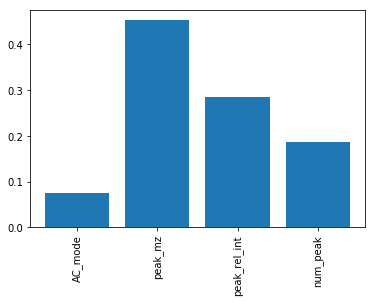

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 


feature_names = ['AC_mode', 'peak_mz', 'peak_rel_int', 'num_peak']
importance = clf_dt.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation = 90)
plt.show()

In [10]:
clf_dt = tree.DecisionTreeClassifier()

parametres_dt = {'criterion' : ['gini', 'entropy']}

grid_clf_dt = model_selection.GridSearchCV(estimator = clf_dt, param_grid = parametres_dt)

grille = grid_clf_dt.fit(X_train, y_train)

print('Meilleurs paramètres de dt:', grid_clf_dt.best_params_)

y_pred_dt = grid_clf_dt.predict(X_test)

print('Score de dt class2 param optimisés:', grid_clf_dt.score(X_test, y_test))
print('Score f1 de dt class2, param optimisés:', metrics.f1_score(y_test, y_pred_dt, average = 'micro'))

C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Meilleurs paramètres de dt: {'criterion': 'entropy'}
Score de dt class2 param optimisés: 0.6599535243996901
Score f1 de dt class2, param optimisés: 0.6599535243996901


In [11]:
mc = pd.crosstab(y_test, y_pred_dt, rownames=['Classes réelles'], colnames=['Classes prédites'])
mc

Classes prédites,Anthocyanin,Aurone,Bavachromene,Chalcone,Dihydroflavonol,Flavanol,Flavanone,Flavone,Flavonoid,Flavonol,Isoflavan,Isoflavane,Isoflavanone,Isoflavene,Isoflavone,Phloridzin,Pterocarpan,Silybin,Silychristin,Xanthohumol
Classes réelles,,,,,,,,,,,,,,,,,,,,
Anthocyanin,269,3,0,5,0,0,11,43,0,131,0,0,0,0,15,0,1,0,0,1
Aurone,2,1,0,1,0,0,2,3,0,7,0,0,0,0,1,0,0,0,0,0
Bavachromene,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
Chalcone,12,0,0,61,0,3,21,6,0,45,0,0,0,0,4,0,0,0,0,1
Dihydroflavonol,0,0,0,1,1,0,2,0,0,2,0,0,0,0,1,0,0,0,0,0
Flavanol,0,0,0,2,0,39,3,6,0,13,0,0,0,0,2,0,0,0,0,0
Flavanone,13,1,0,33,1,2,94,20,0,104,0,1,0,0,10,2,0,0,0,0
Flavone,51,5,0,9,0,4,23,373,1,133,0,0,0,1,24,0,0,0,0,1
Flavonoid,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
